# Testing GLCM / Haralick Features

In [3]:
#!pip install mahotas

In [50]:
import cv2
import numpy as np
import os
import glob
import mahotas as mt
from sklearn.svm import LinearSVC

In [51]:
# load the training dataset
train_path = './waste_images/'
train_names = os.listdir(train_path)

# empty list to hold feature vectors and train labels
train_features = []
train_labels = []

In [52]:
#train_names

In [53]:
def extract_features(image):
        # calculate haralick texture features for 4 types of adjacency
        textures = mt.features.haralick(image)

        # take the mean of it and return it
        ht_mean = textures.mean(axis=0)
        return ht_mean

In [54]:
# loop over the training dataset
print("[STATUS] Started extracting haralick textures..")

for train_name in train_names:
        cur_path = train_path + train_name
        #print(cur_path)
        cur_label = train_name
        #print(cur_label)
        #i = 1
        
        for file in glob.glob(cur_path):
                print("Processing Image - {}".format(cur_label))
                # read the training image
                
                #print(file)
                image = cv2.imread(file)

                # convert the image to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # extract haralick texture from the image
                features = extract_features(gray)

                # append the feature vector and label
                train_features.append(features)
                train_labels.append(cur_label)


[STATUS] Started extracting haralick textures..
Processing Image - Aluminium1.JPG
Processing Image - Aluminium17.JPG
Processing Image - Aluminium18.JPG
Processing Image - Aluminium21.JPG
Processing Image - Aluminium26.JPG
Processing Image - Aluminium3.JPG
Processing Image - Aluminium30.JPG
Processing Image - Aluminium31.JPG
Processing Image - Aluminium32.JPG
Processing Image - Aluminium37.JPG
Processing Image - Aluminium40.JPG
Processing Image - Aluminium44.JPG
Processing Image - Aluminium45.JPG
Processing Image - Aluminium46.JPG
Processing Image - Aluminium47.JPG
Processing Image - Aluminium48.JPG
Processing Image - Aluminium49.JPG
Processing Image - Aluminium5.JPG
Processing Image - Aluminium51.JPG
Processing Image - Aluminium53.JPG
Processing Image - Aluminium54.JPG
Processing Image - Aluminium55.JPG
Processing Image - Aluminium56.JPG
Processing Image - Aluminium57.JPG
Processing Image - Aluminium59.JPG
Processing Image - Aluminium62.JPG
Processing Image - Aluminium63.JPG
Processing

Processing Image - Cardboard and Paper40.JPG
Processing Image - Cardboard and Paper42.JPG
Processing Image - Cardboard and Paper43.JPG
Processing Image - Cardboard and Paper44.JPG
Processing Image - Cardboard and Paper45.JPG
Processing Image - Cardboard and Paper46.JPG
Processing Image - Cardboard and Paper47.JPG
Processing Image - Cardboard and Paper48.JPG
Processing Image - Cardboard and Paper49.JPG
Processing Image - Cardboard and Paper5.JPG
Processing Image - Cardboard and Paper50.JPG
Processing Image - Cardboard and Paper51.JPG
Processing Image - Cardboard and Paper52.JPG
Processing Image - Cardboard and Paper53.JPG
Processing Image - Cardboard and Paper54.JPG
Processing Image - Cardboard and Paper7.JPG
Processing Image - Cardboard and Paper8.JPG
Processing Image - Cardboard and Paper9.JPG
Processing Image - Connector10.JPG
Processing Image - Connector11.JPG
Processing Image - Connector12.JPG
Processing Image - Connector13.JPG
Processing Image - Connector14.JPG
Processing Image - 

Processing Image - Printed Circuit Board15.JPG
Processing Image - Printed Circuit Board150.JPG
Processing Image - Printed Circuit Board151.JPG
Processing Image - Printed Circuit Board152.JPG
Processing Image - Printed Circuit Board153.JPG
Processing Image - Printed Circuit Board154.JPG
Processing Image - Printed Circuit Board155.JPG
Processing Image - Printed Circuit Board156.JPG
Processing Image - Printed Circuit Board158.JPG
Processing Image - Printed Circuit Board159.JPG
Processing Image - Printed Circuit Board16.JPG
Processing Image - Printed Circuit Board160.JPG
Processing Image - Printed Circuit Board161.JPG
Processing Image - Printed Circuit Board162.JPG
Processing Image - Printed Circuit Board163.JPG
Processing Image - Printed Circuit Board164.JPG
Processing Image - Printed Circuit Board165.JPG
Processing Image - Printed Circuit Board166.JPG
Processing Image - Printed Circuit Board167.JPG
Processing Image - Printed Circuit Board168.JPG
Processing Image - Printed Circuit Board17

Processing Image - Printer Ribbon and Toner28.JPG
Processing Image - Printer Ribbon and Toner29.JPG
Processing Image - Printer Ribbon and Toner30.JPG
Processing Image - Printer Ribbon and Toner31.JPG
Processing Image - Printer Ribbon and Toner32.JPG
Processing Image - Printer Ribbon and Toner33.JPG
Processing Image - Printer Ribbon and Toner34.JPG
Processing Image - Printer Ribbon and Toner35.JPG
Processing Image - Printer Ribbon and Toner36.JPG
Processing Image - Printer Ribbon and Toner37.JPG
Processing Image - Printer Ribbon and Toner38.JPG
Processing Image - Printer Ribbon and Toner39.JPG
Processing Image - Printer Ribbon and Toner4.JPG
Processing Image - Printer Ribbon and Toner40.JPG
Processing Image - Printer Ribbon and Toner5.JPG
Processing Image - Printer Ribbon and Toner6.JPG
Processing Image - Printer Ribbon and Toner8.JPG
Processing Image - Printer Ribbon and Toner9.JPG
Processing Image - Tube and Screen11.JPG
Processing Image - Tube and Screen15.JPG
Processing Image - Tube

In [55]:
# have a look at the size of our feature vector and labels
print("Training features: {}".format(np.array(train_features).shape))
print("Training labels: {}".format(np.array(train_labels).shape))

Training features: (704, 13)
Training labels: (704,)


In [71]:
np.array(train_features).shape

(704, 13)

In [77]:
np.array(train_features)

array([[ 1.54053079e-03,  6.03569533e+01,  9.81541378e-01, ...,
         3.31263362e+00, -4.36869788e-01,  9.98461601e-01],
       [ 3.79360676e-03,  7.09889302e+01,  9.36385827e-01, ...,
         3.16983882e+00, -4.12577802e-01,  9.96745759e-01],
       [ 3.03942249e-03,  7.40975358e+01,  9.22668375e-01, ...,
         3.19696887e+00, -3.93946646e-01,  9.95828493e-01],
       ...,
       [ 3.65901820e-03,  5.83535896e+01,  9.78028093e-01, ...,
         2.55519314e+00, -5.40826315e-01,  9.99620890e-01],
       [ 1.67127958e-03,  7.02222638e+01,  9.76973988e-01, ...,
         3.03925282e+00, -4.75242511e-01,  9.99286410e-01],
       [ 2.86688316e-03,  4.82855838e+01,  9.84554590e-01, ...,
         2.56508304e+00, -5.47457924e-01,  9.99721666e-01]])

In [57]:
train_labels

['Aluminium1.JPG',
 'Aluminium17.JPG',
 'Aluminium18.JPG',
 'Aluminium21.JPG',
 'Aluminium26.JPG',
 'Aluminium3.JPG',
 'Aluminium30.JPG',
 'Aluminium31.JPG',
 'Aluminium32.JPG',
 'Aluminium37.JPG',
 'Aluminium40.JPG',
 'Aluminium44.JPG',
 'Aluminium45.JPG',
 'Aluminium46.JPG',
 'Aluminium47.JPG',
 'Aluminium48.JPG',
 'Aluminium49.JPG',
 'Aluminium5.JPG',
 'Aluminium51.JPG',
 'Aluminium53.JPG',
 'Aluminium54.JPG',
 'Aluminium55.JPG',
 'Aluminium56.JPG',
 'Aluminium57.JPG',
 'Aluminium59.JPG',
 'Aluminium62.JPG',
 'Aluminium63.JPG',
 'Aluminium67.JPG',
 'Aluminium69.JPG',
 'Aluminium7.JPG',
 'Aluminium70.JPG',
 'Aluminium71.JPG',
 'Aluminium72.JPG',
 'Aluminium77.JPG',
 'Aluminium79.JPG',
 'Aluminium80.JPG',
 'Aluminium81.JPG',
 'Aluminium82.JPG',
 'Aluminium83.JPG',
 'Aluminium84.JPG',
 'Aluminium85.JPG',
 'Aluminium87.JPG',
 'Aluminium88.JPG',
 'Aluminium9.JPG',
 'Aluminium90.JPG',
 'Aluminium92.JPG',
 'Aluminium94.JPG',
 'Battery100.JPG',
 'Battery101.JPG',
 'Battery102.JPG',
 'Batter

# Testing LBP

---
### Step 1 - get images and patches

using function `extract_patches_2d()` from `sklearn.feature_extraction.image`

We are going to use also:
* joblib: Parallel, delayed - to execute function in parallel
* os: listdir - to list files in a folder

In [58]:
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
import imageio
from imageio import imread
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from joblib import Parallel, delayed
from skimage import feature

from github.MainClass import Github


def get_patches(img_file, random_state, patch_size=(11, 11), n_patches=250):
    '''Extracts subimages
       Parameters
           img_file: path for an image
           patch_size: size of each patch
           n_patches: number of patches to be extracted
    '''

    img = imread(img_file)
    
    # Extract subimages
    patch = extract_patches_2d(img, 
                               patch_size=patch_size,
                               max_patches=n_patches, 
                               random_state=random_state)
    
    return patch.reshape((n_patches, 
                          np.prod(patch_size) * len(img.shape)))

---

We have to define
* the size of the patch and number of patches per image
* the path to search for training images
* note each patch has an extra dimension due to the color channels (1 for graylevel, 3 for RGB) 

Patches extracted to create dictionary of features
Total of images =  704
Size of each array of patches =  (250, 675)


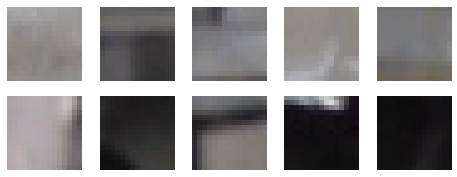

In [60]:
# BOF parameters
tam_patch = (15, 15)
n_patches = 250
path_imgs = './waste_images/'
#path_imgs = 'C:/Users/j_ale/OneDrive/Image Processing/imageprocessing_course_icmc/images/waste_training/'
random_state = 1

# get list of files
l_imgs = listdir(path_imgs)
# total of images
n_imgs = len(l_imgs)

# Extract patches in parallel
# returns a list of the same size of the number of images
patch_arr = Parallel(n_jobs=-1)(delayed(get_patches)(path_imgs+arq_img, 
                                                    random_state,
                                                    tam_patch,
                                                    n_patches)
                                for arq_img in l_imgs)

print('Patches extracted to create dictionary of features')
print('Total of images = ', len(patch_arr))
print('Size of each array of patches = ', patch_arr[0].shape)

# shows some image patches
img_ind = 32
plt.figure(figsize=(8,3))
for i in np.arange(1,11):
    plt.subplot(2,5,i)
    plt.imshow(patch_arr[img_ind][i].reshape((tam_patch[0],tam_patch[1],3)))
    plt.axis('off')

In [73]:
patch_arr[0].shape

(15, 15, 3)

---
### Step 2 - obtain features from patches

We are going to use LBP features as base descriptor

In [66]:
def lbp_features(img, radius=1, sampling_pixels=8):
    
    # LBP operates in single channel images so if RGB images are provided
    # we have to convert it to grayscale
    if (len(img.shape) > 2):
        img = img.astype(float)
        # RGB to grayscale convertion using Luminance
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11

    # converting to uint8 type for 256 graylevels
    img = img.astype(np.uint8)
    
    # normalize values can also help improving description
    i_min = np.min(img)
    i_max = np.max(img)
    if (i_max - i_min != 0):
        img = (img - i_min)/(i_max-i_min)
    
    # compute LBP
    lbp = feature.local_binary_pattern(img, sampling_pixels, radius, method="uniform")
    
    # LBP returns a matrix with the codes, so we compute the histogram
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, sampling_pixels + 3), range=(0, sampling_pixels + 2))

    # normalization
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns
    return hist

In [67]:
patch_arr = np.array(patch_arr, copy=True)
patch_arr = patch_arr.reshape((patch_arr.shape[0] * patch_arr.shape[1],
                               tam_patch[0],tam_patch[0],3))

# obtaining features lbp for each patch
patch_lbp = []
for pat in patch_arr:
        f = lbp_features(pat,2,8)
        patch_lbp.append(f)

patch_lbp = np.array(patch_lbp, copy=False)
print('Instances = ', len(patch_lbp), ' size = ', patch_lbp[0].shape[0])
print('Created LBP feature spaces')
print('\tpatches = ', len(patch_lbp), ' size = ', patch_lbp[0].shape[0])

Instances =  176000  size =  10
Created LBP feature spaces
	patches =  176000  size =  10


In [76]:
patch_lbp.shape

(176000, 10)

---
### Step 3 - learn dictionary

We are going to use a clustering algorithm, KMeans, defining the number of visual words
* can range from 25 to 1000    

In [9]:
n_dic = 50 # size of the dictionary
random_state = 1

# Define a KMeans clustering model
kmeans_model = KMeans(n_clusters=n_dic, 
                      verbose=False, 
                      init='random',
                      random_state=random_state, 
                      n_init=3)
# fit the model
kmeans_model.fit(patch_lbp)

KMeans(init='random', n_clusters=50, n_init=3, random_state=1, verbose=False)

(-0.015777777707654324,
 0.33133333186074077,
 -0.015111111043950617,
 0.317333331922963)

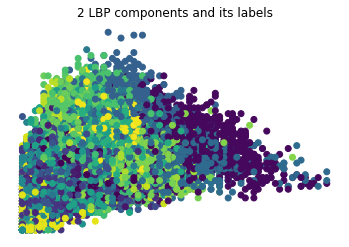

In [10]:
plt.scatter(patch_lbp[:, 0], patch_lbp[:, 1], c=kmeans_model.labels_)
plt.title('2 LBP components and its labels')
plt.axis('off')

---
### Step 4 - obtain histograms from Bag of features

Since we have `n_imgs` with `n_patches`

We check the frequency of each visual word in each training images

In [11]:
# compute features for each image
img_feats = []
for i in range(n_imgs):
    # predicting n_patches of an image
    y = kmeans_model.predict(patch_lbp[i*n_patches: (i*n_patches)+n_patches])

    # computes histogram and append in the array
    hist_bof,_ = np.histogram(y, bins=range(n_dic+1), density=True)
    img_feats.append(hist_bof)

img_feats = np.array(img_feats, copy=False)
print('Number of images and features = ', img_feats.shape)

Number of images and features =  (704, 50)


Array `img_feats` is a set of features for each image

---
### Step 5 - using features for recognition

Let us use the features for *content-based image retrieval*

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


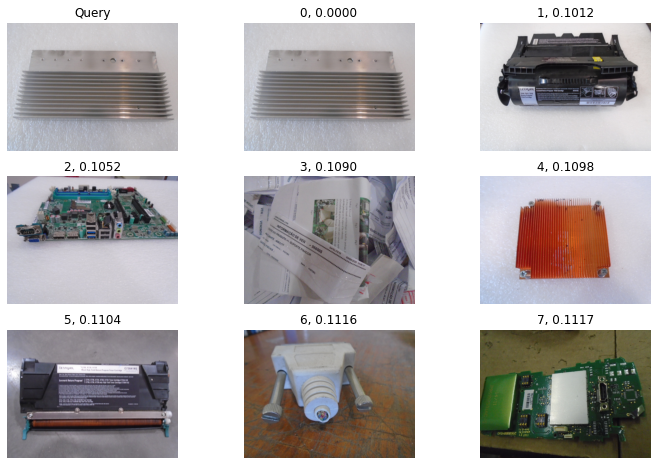

In [13]:
path_query = './waste_images/Aluminium1.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP features
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extracted')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


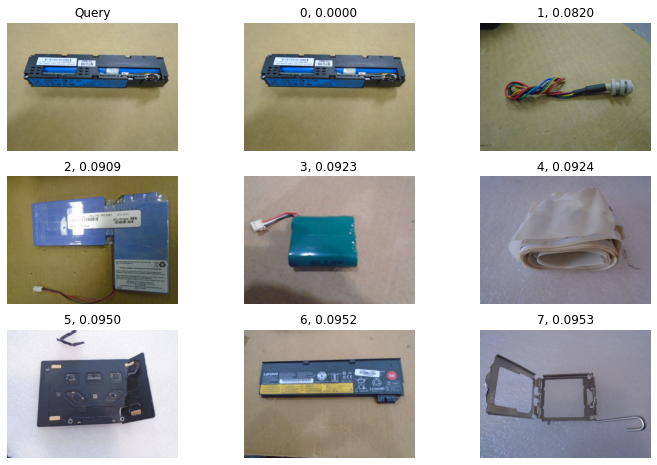

In [49]:
#path_query = 'C:/Users/j_ale/OneDrive/Image Processing/imageprocessing_course_icmc/images/waste_test/Battery11.jpg'
path_query = './waste_images/Battery28.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP features
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

In [ ]:
#path_query = 'C:/Users/j_ale/OneDrive/Image Processing/imageprocessing_course_icmc/images/waste_test/Battery11.jpg'
path_query = './waste_images/Battery188.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP features
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


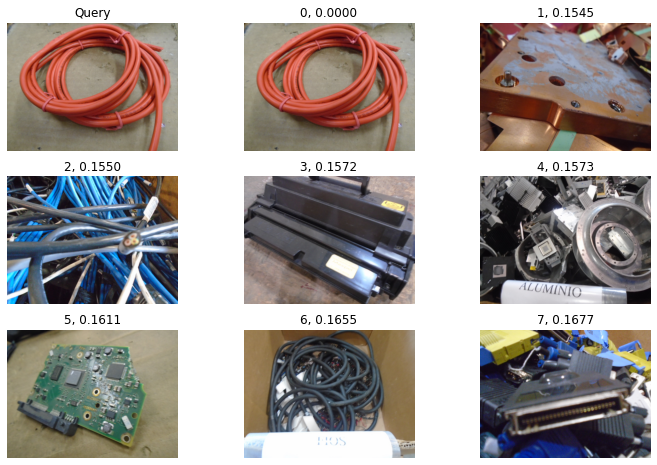

In [14]:
path_query = './waste_images/Cable and Wire5.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extracted')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


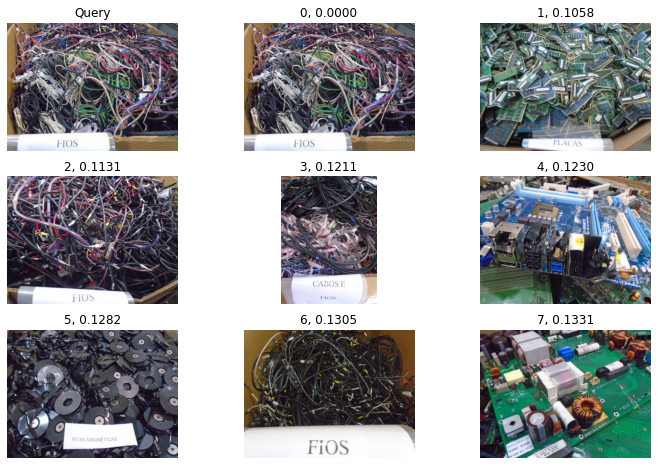

In [15]:
path_query = './waste_images/Cable and Wire88.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


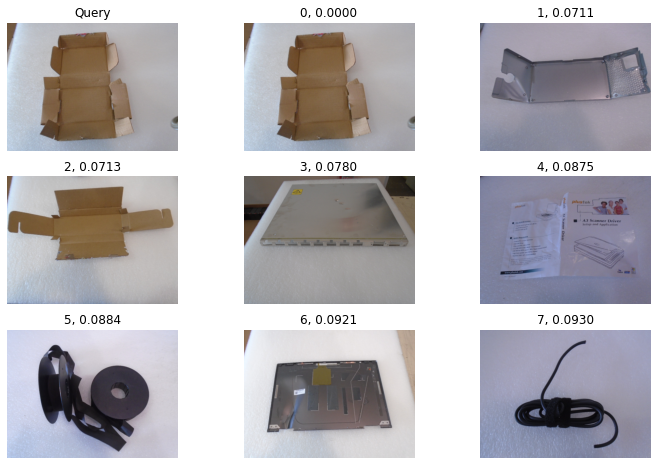

In [17]:
path_query = './waste_images/Cardboard and Paper4.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


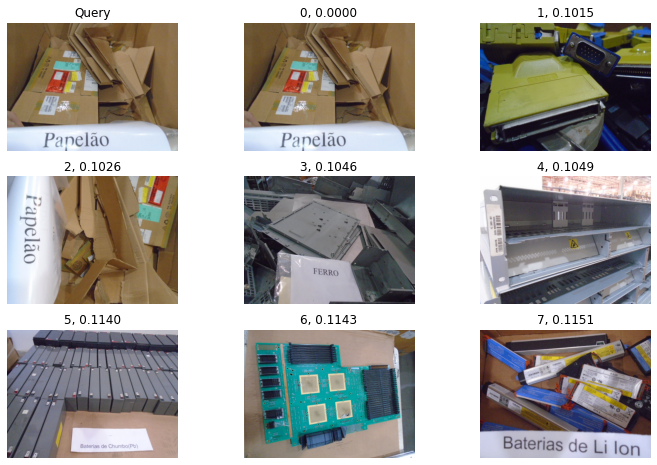

In [18]:
path_query = './waste_images/Cardboard and Paper19.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


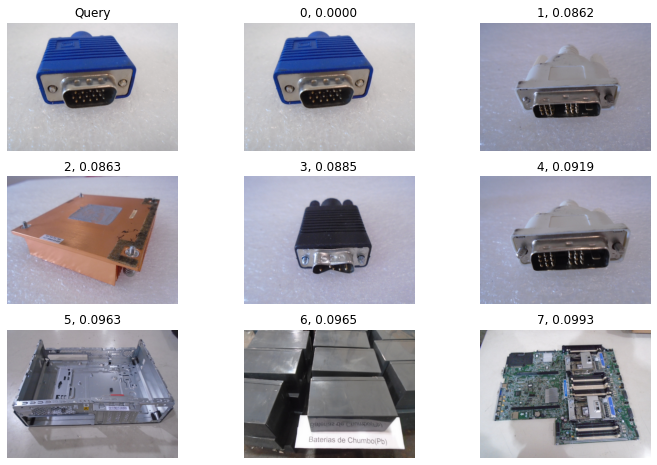

In [20]:
path_query = './waste_images/Connector11.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


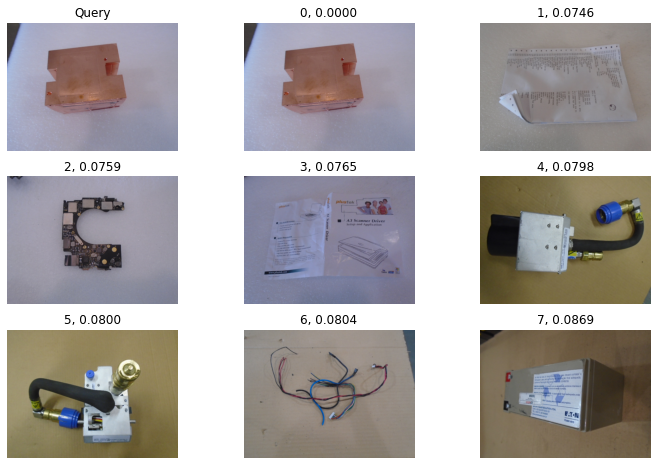

In [24]:
path_query = './waste_images/Copper53.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


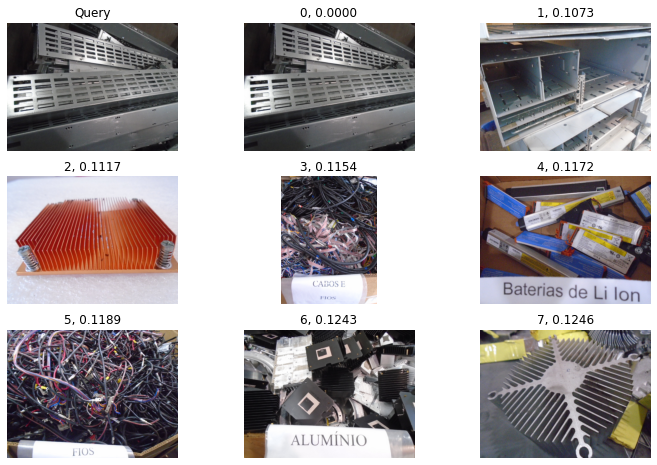

In [26]:
path_query = './waste_images/Iron36.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


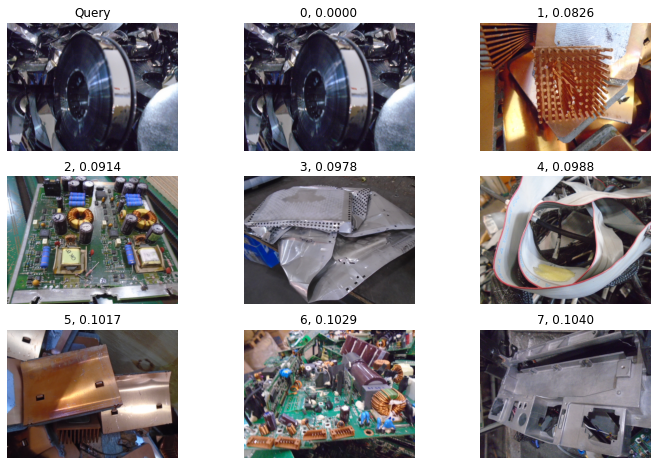

In [29]:
path_query = './waste_images/Magnetic Tape2.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


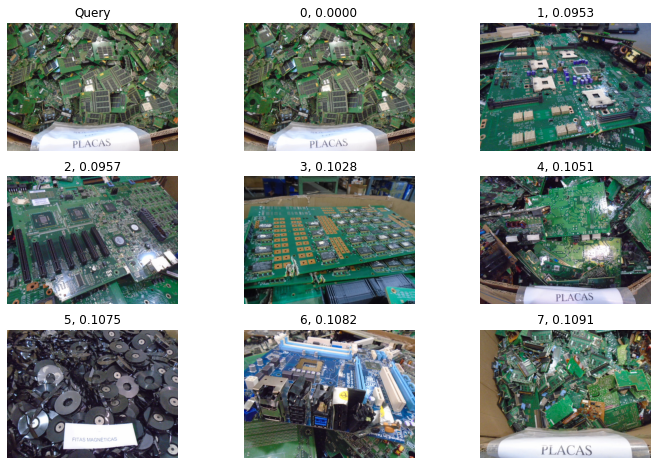

In [55]:
path_query = './waste_images/Printed Circuit Board189.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


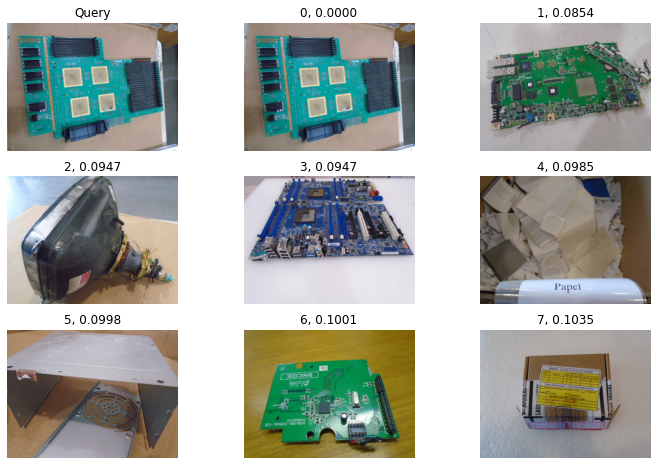

In [36]:
path_query = './waste_images/Printed Circuit Board193.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


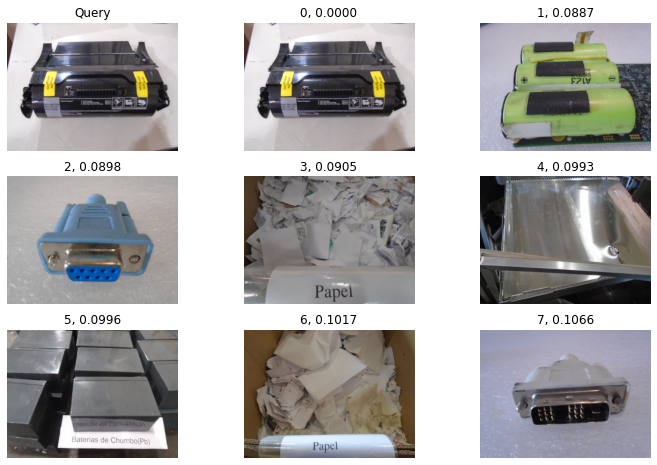

In [37]:
path_query = './waste_images/Printer Ribbon and Toner8.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


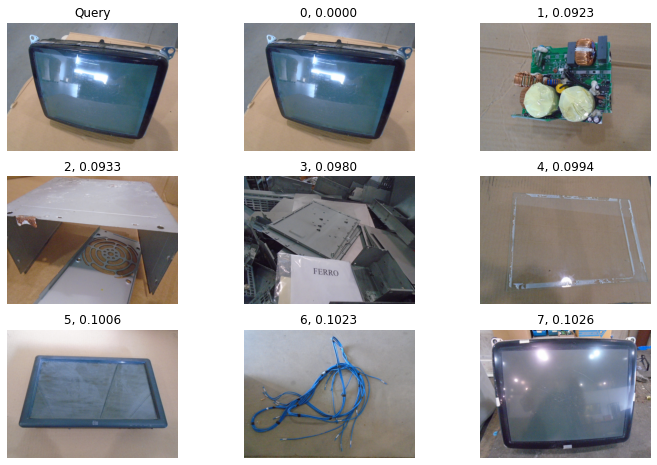

In [39]:
path_query = './waste_images/Tube and Screen40.JPG'


# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


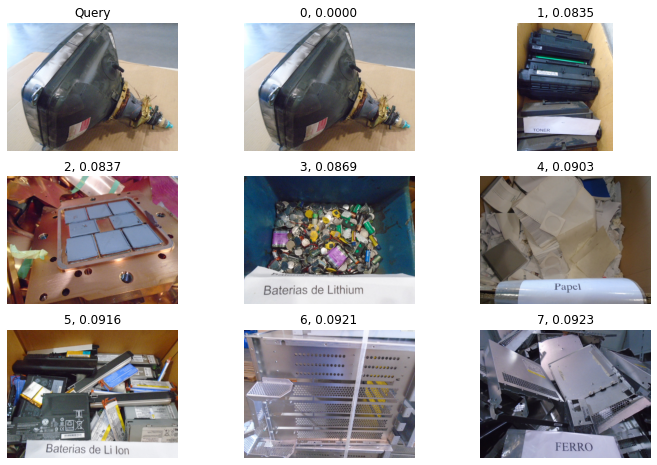

In [42]:
path_query = './waste_images/Tube and Screen41.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')

Extracted patches
(250, 15, 15, 3)
LBP extractd
(250, 10)


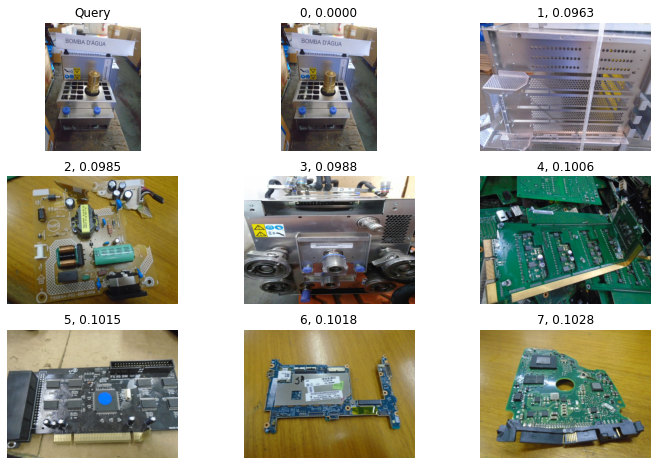

In [43]:
path_query = './waste_images/Water Pump1.JPG'

# get query patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Extracted patches')
print(query_patches.shape)

# get LBP feathres
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,2,8)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP extractd')
print(query_lbp.shape)

# get visual words for query
y = kmeans_model.predict(query_lbp)
# computes descriptor
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

# computes distances
dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# check the nearest images
k = 8
k_cbir = np.argsort(dists)[:k]

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')